# iris Data Keras Modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* Colab File Upload
 - iris.csv

In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root 3867 Aug  6 02:04 iris.csv
drwxr-xr-x 1 root root 4096 Jul 30 16:30 sample_data


* pandas DataFrame

In [ ]:
import pandas as pd

iris = pd.read_csv('iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [ ]:
iris.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [ ]:
iris_TR = iris.values

iris_TR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [ ]:
TR_X = iris_TR[:,0:4].astype(float)
TR_Y = iris_TR[:,4]

TR_X.shape, TR_Y.shape

((150, 4), (150,))

> ## 3) Normalization with Keras

* normalize( )

In [ ]:
import keras

TR_XN = keras.utils.normalize(TR_X)

TR_XN

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

> ## 4) One Hot Encoding with sklearn Package & Keras

* ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
encoder.fit(TR_Y)
TR_YL = encoder.transform(TR_Y)

TR_YL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* to_categorical( )

In [ ]:
TR_YO = keras.utils.to_categorical(TR_YL)

TR_YO

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 5) Train & Test Split with sklearn Package

* 8:2

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TR_XN, TR_YO, 
                                                    test_size = 0.2, 
                                                    random_state = 2045) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [ ]:
from keras import models
from keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [ ]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [ ]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [ ]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (x_test, y_test))

Epoch 1/500
18/18 [==============================] - 0s 12ms/step - loss: 1.0705 - accuracy: 0.3500 - val_loss: 1.0799 - val_accuracy: 0.2667
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 1.0507 - accuracy: 0.3500 - val_loss: 1.0629 - val_accuracy: 0.2667
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 1.0350 - accuracy: 0.3500 - val_loss: 1.0504 - val_accuracy: 0.2667
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.3750 - val_loss: 1.0428 - val_accuracy: 0.2667
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 1.0133 - accuracy: 0.3917 - val_loss: 1.0339 - val_accuracy: 0.6333
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 1.0059 - accuracy: 0.5750 - val_loss: 1.0280 - val_accuracy: 0.4667
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 0.9983 - accuracy: 0.4417 - val_loss: 1.0223 - val_accuracy: 0.5000
Epoch 8/500


> ## 5) 학습 결과 시각화

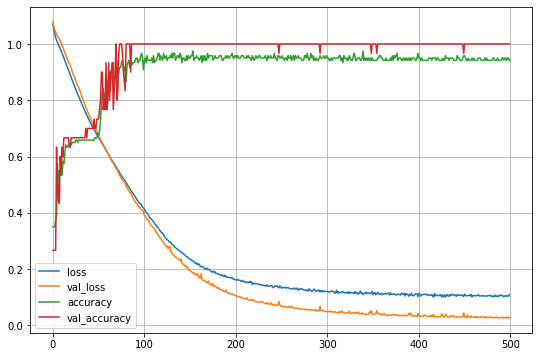

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = Model_iris.evaluate(x_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

1/1 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 1.0000
Loss = 0.03
Accuracy = 1.00


> ## 7) Model Predict

* Probability

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(x_test)

array([[0.99957, 0.00039, 0.00004],
       [0.99561, 0.00411, 0.00028],
       [0.0005 , 0.99179, 0.0077 ],
       [0.     , 0.00107, 0.99893],
       [0.99979, 0.00018, 0.00002],
       [0.0001 , 0.99416, 0.00574],
       [0.     , 0.00909, 0.99091],
       [0.99979, 0.00019, 0.00002],
       [0.     , 0.00522, 0.99478],
       [0.99962, 0.00034, 0.00004],
       [0.     , 0.79614, 0.20386],
       [0.     , 0.0221 , 0.9779 ],
       [0.00001, 0.98874, 0.01125],
       [0.99978, 0.00019, 0.00002],
       [0.9998 , 0.00018, 0.00002],
       [0.     , 0.97354, 0.02646],
       [0.     , 0.95165, 0.04835],
       [0.9998 , 0.00018, 0.00002],
       [0.00004, 0.99497, 0.00498],
       [0.99979, 0.00018, 0.00002],
       [0.99976, 0.00022, 0.00003],
       [0.9998 , 0.00018, 0.00002],
       [0.     , 0.00936, 0.99064],
       [0.9998 , 0.00018, 0.00002],
       [0.     , 0.25877, 0.74123],
       [0.     , 0.00194, 0.99806],
       [0.9998 , 0.00018, 0.00002],
       [0.00001, 0.98784, 0.

* Class

In [ ]:
y_hat = Model_iris.predict_classes(x_test)

y_hat

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* One-Hot Encoding to Array
 * np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
 * axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* Confusion Matrix & Claasification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [ ]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root 3867 Aug  6 02:04 iris.csv
drwxr-xr-x 1 root root 4096 Jul 30 16:30 sample_data


In [ ]:
Model_iris.save('Model_iris.h5')

!ls -l

total 40
-rw-r--r-- 1 root root  3867 Aug  6 02:04 iris.csv
-rw-r--r-- 1 root root 30808 Aug  6 03:34 Model_iris.h5
drwxr-xr-x 1 root root  4096 Jul 30 16:30 sample_data


* Download Colab File System to Local File System

In [ ]:
from google.colab import files

files.download('Model_iris.h5')

* Load from Colab File System

In [ ]:
from keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [ ]:
Model_local.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

> ## 2) Google Drive

* Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Check Mounted_Drive

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 88517
-rw------- 1 root root    20066 Sep 20  2013 cat.1700.jpg
-rw------- 1 root root 90618980 May  3 07:09 dogs_and_cats_small.zip
-rw------- 1 root root      741 Nov 22  2019 PII.csv


In [ ]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')

DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [ ]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 31
-rw------- 1 root root 30808 Aug  6 03:47 001_Model_iris.h5


* Load from Mounted Google Drive Directory

In [ ]:
from keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
Model_google.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

# 
# 
# 
# The End
# 
# 
# 